In [23]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.font_manager as fm

In [24]:
import pandas as pd
df1 = pd.read_excel('C:/Users/dudtj/OneDrive - 숭실대학교 - Soongsil University/Desktop/CL/python/강서구 경진대회/data/서울특별시 강서구 (안심이) CCTV 설치 현황.xlsx')
df2 = pd.read_excel('C:/Users/dudtj/OneDrive - 숭실대학교 - Soongsil University/Desktop/CL/python/강서구 경진대회/data/강서구 상주인구(2020 1분기~2021 3분기 동정보 포함).xlsx')

In [25]:
#글씨설정
plt.rc("font",family="Malgun Gothic")
sns.set(font="Margun Gothic",rc={"axes.unicode_minus":False},style='darkgrid')
mpl.rc('font',family='Malgun Gothic')
plt.rcParams['axes.unicode_minus']=False

#맷플롯립 한글 설정
font_path = r'C:\Users\dudtj\OneDrive\Desktop\금융데이터\NanumFontSetup_TTF_ALL'
fontprop = fm.FontProperties(fname=font_path, size=18)

In [26]:
df1.head()

,자치구,안심 주소,CCTV 용도,위도,경도,CCTV 수량,수정 일시,동정보
0,강서구,P253001(A5002)_화곡1동 908-9(호돌이 공원),도심공원,37.528107,126.845980,1,2021-01-29,NaN
1,강서구,P303005_화곡8동 892-17(모태어린이공원),도심공원,37.529472,126.849621,1,2021-01-29,NaN
2,강서구,P263002_화곡2동 883-3 하마터어린이공원,도심공원,37.529998,126.853446,1,2021-01-29,NaN
3,강서구,P263001_화곡2동 845-19 뜸부기어린이공원,도심공원,37.530087,126.856926,1,2021-01-29,NaN
4,강서구,P253005_화곡1동 355-12(필마어린이공원),도심공원,37.531600,126.838757,1,2021-01-29,NaN


In [27]:
df2.head()

,기준_년_코드,기준_분기_코드,상권_구분_코드,상권_구분_코드_명,상권 코드,상권 코드 명,총 상주인구 수,총 가구 수,동 정보
0,2021,3,A,골목상권,1000552,가로공원로76가길,2899,1343,화곡1동
1,2021,2,A,골목상권,1000552,가로공원로76가길,2899,1343,화곡1동
2,2021,1,A,골목상권,1000552,가로공원로76가길,3121,1397,화곡1동
3,2020,4,A,골목상권,1000552,가로공원로76가길,3121,1397,화곡1동
4,2020,3,A,골목상권,1000552,가로공원로76가길,3121,1397,화곡1동


In [28]:
address=['가양1동','가양2동','가양3동','공항동','등촌1동','등촌2동','등촌3동','발산1동','방화1동','방화2동','개화동','화곡동','등촌동','가양동'
         '방화2동','방화3동','염창동','우장산동','화곡1동','화곡2동','화곡3동','화곡4동','화곡6동','화곡8동','화곡본동','마곡동']

In [29]:
#for j in range(0,len(df1)):
#    for i in range(0,len(address)):
#        if address[i] in df1['안심 주소'][j]:
#            df1['동 정보'][j]=address[i]

In [30]:
df1=df1[df1["CCTV 용도"]=='쓰레기 무단투기']

groups = df1.groupby('동정보')
data1=groups.count() #평균
data1=data1.reset_index()
data1=data1[['동정보','CCTV 수량']]
data1.columns=['동 정보','개수']

In [31]:
#df3의 경우 21년 3분기만 
df3=df2[df2["기준_년_코드"]==2021.0]
df3=df2[df2["기준_분기_코드"]==3]

In [32]:
groups = df2.groupby('동 정보')
data2=groups.mean() #평균
data2=data2.reset_index()
data2=data2[['동 정보','총 상주인구 수']]


In [33]:
df5 = pd.read_excel('C:/Users/dudtj/OneDrive - 숭실대학교 - Soongsil University/Desktop/CL/python/강서구 경진대회/data/행정동코드_매핑정보_2018_1.xlsx')
df5.head()

,통계청행정동코드,행자부행정동코드,시도명,시군구명,동 정보
0,1116051,11500510,서울,강서구,염창동
1,1116052,11500520,서울,강서구,등촌1동
2,1116053,11500530,서울,강서구,등촌2동
3,1116054,11500535,서울,강서구,등촌3동
4,1116055,11500590,서울,강서구,화곡본동


In [34]:
last_df=pd.merge(data1,data2,on='동 정보')
last_df['개수/상주인구']=last_df['개수']/last_df['총 상주인구 수']*10000
last_df['총_상주인구_수[단위:1천명]']=last_df['총 상주인구 수']/1000
last_df

,동 정보,개수,총 상주인구 수,개수/상주인구,총_상주인구_수[단위:1천명]
0,공항동,2,2796.142857,7.152710,2.796143
1,등촌1동,1,2173.250000,4.601403,2.173250
2,등촌2동,1,2691.523810,3.715367,2.691524
3,발산1동,1,2880.857143,3.471189,2.880857
4,방화2동,1,2643.892857,3.782302,2.643893
5,화곡1동,6,2980.328571,20.132008,2.980329
6,화곡2동,3,2929.678571,10.240031,2.929679
7,화곡3동,1,2433.047619,4.110072,2.433048
8,화곡4동,3,2527.600000,11.868967,2.527600
9,화곡8동,3,3487.857143,8.601270,3.487857


In [35]:
df_code=pd.merge(last_df,df5,on='동 정보')
df_code

,동 정보,개수,총 상주인구 수,개수/상주인구,총_상주인구_수[단위:1천명],통계청행정동코드,행자부행정동코드,시도명,시군구명
0,공항동,2,2796.142857,7.152710,2.796143,1116069,11500620,서울,강서구
1,등촌1동,1,2173.250000,4.601403,2.173250,1116052,11500520,서울,강서구
2,등촌2동,1,2691.523810,3.715367,2.691524,1116053,11500530,서울,강서구
3,발산1동,1,2880.857143,3.471189,2.880857,1116067,11500611,서울,강서구
4,방화2동,1,2643.892857,3.782302,2.643893,1116071,11500640,서울,강서구
5,화곡1동,6,2980.328571,20.132008,2.980329,1116073,11500540,서울,강서구
6,화곡2동,3,2929.678571,10.240031,2.929679,1116057,11500550,서울,강서구
7,화곡3동,1,2433.047619,4.110072,2.433048,1116058,11500560,서울,강서구
8,화곡4동,3,2527.600000,11.868967,2.527600,1116059,11500570,서울,강서구
9,화곡8동,3,3487.857143,8.601270,3.487857,1116063,11500593,서울,강서구


In [36]:
#df_code.to_excel("동 기준 CCTV 및 상주인구수.xlsx")

In [37]:
last_df.sort_values('개수',ascending=False).head()

,동 정보,개수,총 상주인구 수,개수/상주인구,총_상주인구_수[단위:1천명]
5,화곡1동,6,2980.328571,20.132008,2.980329
10,화곡본동,4,2976.035714,13.440699,2.976036
6,화곡2동,3,2929.678571,10.240031,2.929679
8,화곡4동,3,2527.600000,11.868967,2.527600
9,화곡8동,3,3487.857143,8.601270,3.487857


In [38]:
last_df.sort_values('총 상주인구 수',ascending=False).head()

,동 정보,개수,총 상주인구 수,개수/상주인구,총_상주인구_수[단위:1천명]
9,화곡8동,3,3487.857143,8.601270,3.487857
5,화곡1동,6,2980.328571,20.132008,2.980329
10,화곡본동,4,2976.035714,13.440699,2.976036
6,화곡2동,3,2929.678571,10.240031,2.929679
3,발산1동,1,2880.857143,3.471189,2.880857


In [39]:
last_df.sort_values('개수/상주인구').head()

,동 정보,개수,총 상주인구 수,개수/상주인구,총_상주인구_수[단위:1천명]
3,발산1동,1,2880.857143,3.471189,2.880857
2,등촌2동,1,2691.523810,3.715367,2.691524
4,방화2동,1,2643.892857,3.782302,2.643893
7,화곡3동,1,2433.047619,4.110072,2.433048
1,등촌1동,1,2173.250000,4.601403,2.173250


화곡8동이 가장 적어서 화곡8동으로 하는 편이 나을듯.

In [40]:
ratio_df = last_df.sort_values('개수/상주인구')
ratio_df.rename(columns={'개수/상주인구':'개수/상주인구[단위:1만명]'},inplace=True)
ratio_df.reset_index(inplace=True)
ratio_df

,index,동 정보,개수,총 상주인구 수,개수/상주인구[단위:1만명],총_상주인구_수[단위:1천명]
0,3,발산1동,1,2880.857143,3.471189,2.880857
1,2,등촌2동,1,2691.523810,3.715367,2.691524
2,4,방화2동,1,2643.892857,3.782302,2.643893
3,7,화곡3동,1,2433.047619,4.110072,2.433048
4,1,등촌1동,1,2173.250000,4.601403,2.173250
5,0,공항동,2,2796.142857,7.152710,2.796143
6,9,화곡8동,3,3487.857143,8.601270,3.487857
7,6,화곡2동,3,2929.678571,10.240031,2.929679
8,8,화곡4동,3,2527.600000,11.868967,2.527600
9,10,화곡본동,4,2976.035714,13.440699,2.976036


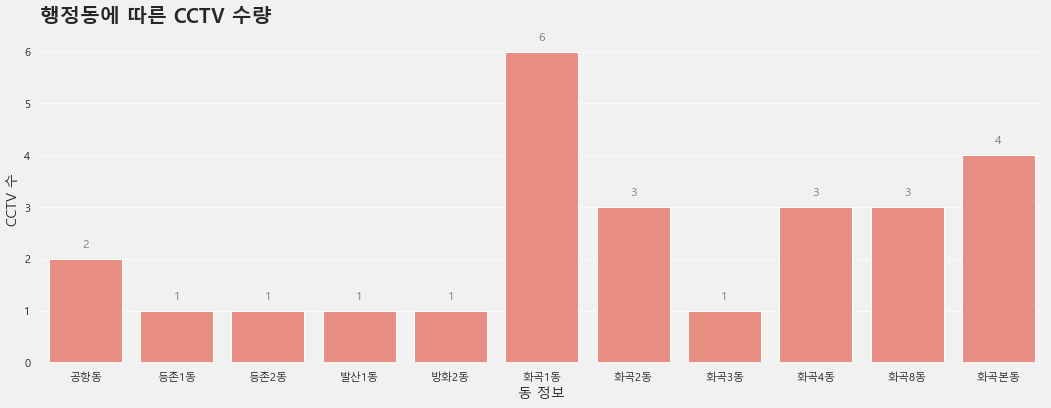

In [41]:
fig = plt.figure(figsize=(18,6))
ax=sns.barplot(x="동 정보",y="개수",data=last_df,color="salmon")

bg_color="#f1f1f1"
fig.patch.set_facecolor(bg_color)
fig.set_facecolor(bg_color)

for p in ax.patches:
    ax.annotate(format(p.get_height(),'.0f'),
               (p.get_x()+p.get_width()/2.,
               p.get_height()),
               ha='center',va='center',
               size=12,color='grey',
               xytext=(0,14),
               textcoords='offset points')
plt.xlabel("동 정보",size=14)
plt.ylabel("CCTV 수",size=14)
plt.title("행정동에 따른 CCTV 수량",size=20,weight='bold',pad='13',loc='left')
plt.box(False)
plt.grid(True,axis='y',alpha=10,linestyle='--')
plt.show()

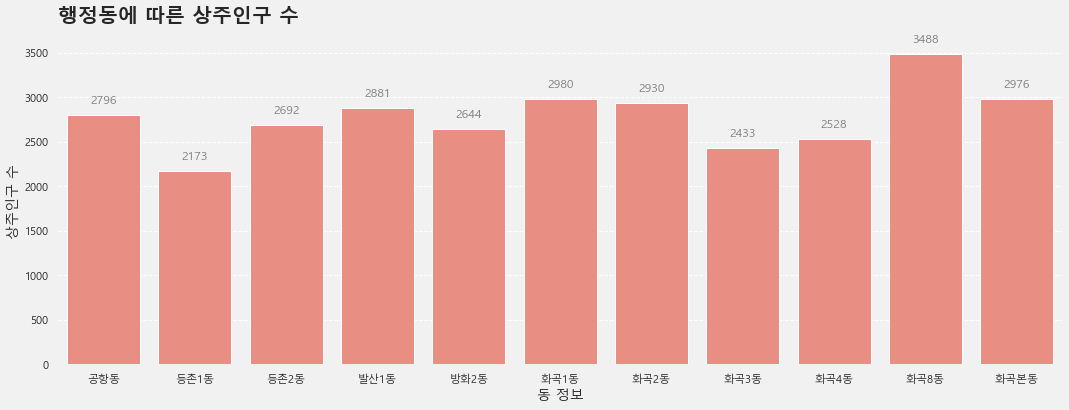

In [42]:
fig = plt.figure(figsize=(18,6))
ax=sns.barplot(x="동 정보",y="총 상주인구 수",data=last_df,color="salmon")

bg_color="#f1f1f1"
fig.patch.set_facecolor(bg_color)
fig.set_facecolor(bg_color)

for p in ax.patches:
    ax.annotate(format(p.get_height(),'.0f'),
               (p.get_x()+p.get_width()/2.,
               p.get_height()),
               ha='center',va='center',
               size=12,color='grey',
               xytext=(0,14),
               textcoords='offset points')
plt.xlabel("동 정보",size=14)
plt.ylabel("상주인구 수",size=14)
plt.title("행정동에 따른 상주인구 수",size=20,weight='bold',pad='15',loc='left')
plt.box(False)
plt.grid(True,axis='y',alpha=10,linestyle='--')
plt.show()

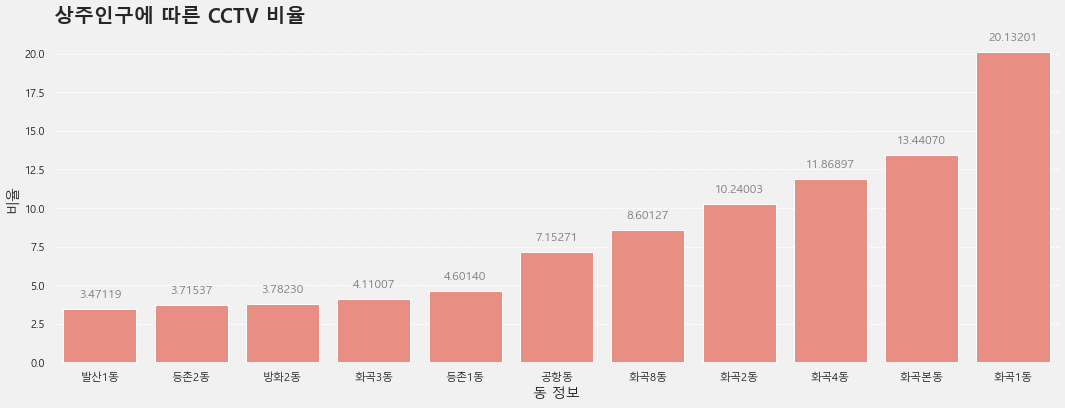

In [43]:
fig = plt.figure(figsize=(18,6))
ax=sns.barplot(x="동 정보",y="개수/상주인구[단위:1만명]",data=ratio_df,color="salmon")

bg_color="#f1f1f1"
fig.patch.set_facecolor(bg_color)
fig.set_facecolor(bg_color)

for p in ax.patches:
    ax.annotate(format(p.get_height(),'.5f'),
               (p.get_x()+p.get_width()/2.,
               p.get_height()),
               ha='center',va='center',
               size=12,color='grey',
               xytext=(0,14),
               textcoords='offset points')
plt.xlabel("동 정보",size=14)
plt.ylabel("비율",size=14)
plt.title("상주인구에 따른 CCTV 비율",size=20,weight='bold',pad='13',loc='left')
plt.box(False)
plt.grid(True,axis='y',alpha=10,linestyle='--')
plt.show()

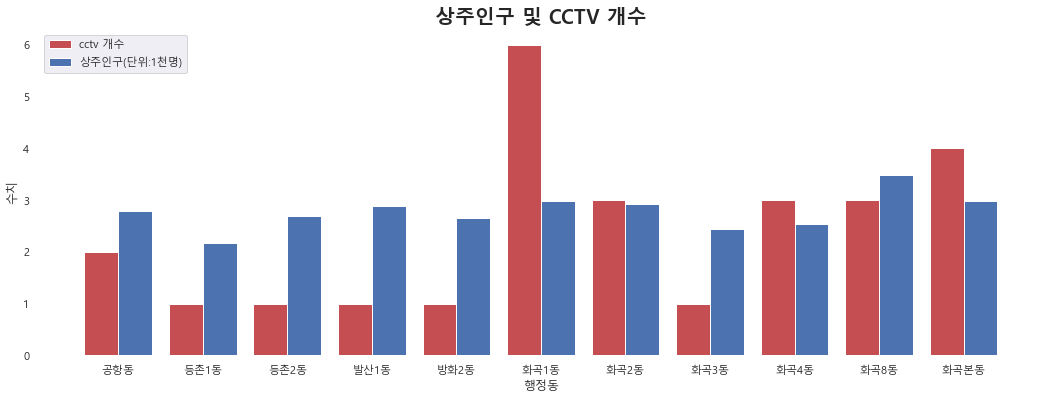

In [44]:
import numpy
fig,ax=plt.subplots(figsize=(18,6))
x=numpy.arange(len(last_df['동 정보']))

plt.bar(x-0.2,last_df['개수'],color='r',label='cctv 개수',width=0.4)
plt.bar(x+0.2,last_df['총_상주인구_수[단위:1천명]'],label='상주인구(단위:1천명)',color='b',width=0.4)
plt.xticks(x,last_df['동 정보'])
plt.legend(loc='upper left')
plt.xlabel('행정동')
plt.ylabel('수치')
plt.title('상주인구 및 CCTV 개수',size=20,weight='bold')
plt.box(False)
plt.grid(True,axis='y',alpha=10,linestyle='--')
plt.show()

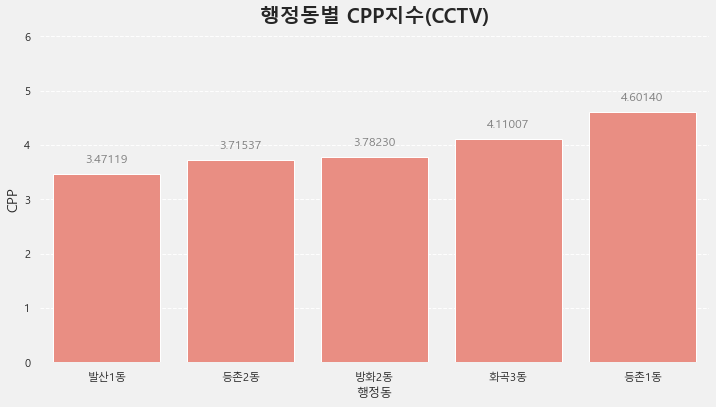

In [45]:
else_df=ratio_df[0:5]
fig = plt.figure(figsize=(12,6))
ax=sns.barplot(x="동 정보",y="개수/상주인구[단위:1만명]",data=else_df,color="salmon")

bg_color="#f1f1f1"
fig.patch.set_facecolor(bg_color)
fig.set_facecolor(bg_color)

for p in ax.patches:
    ax.annotate(format(p.get_height(),'.5f'),
               (p.get_x()+p.get_width()/2.,
               p.get_height()),
               ha='center',va='center',
               size=12,color='grey',
               xytext=(0,14),
               textcoords='offset points')
plt.xlabel("행정동",size=12)
plt.ylabel("CPP",size=14)
plt.title("행정동별 CPP지수(CCTV)",size=20,weight='bold',pad='13')
plt.box(False)
plt.grid(True,axis='y',alpha=10,linestyle='--')
plt.ylim(0,6)
plt.show()